In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

#import plotly
#import plotly.express as px

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import tqdm
#from functools import lru_cache
#import re
import networkx as nx
from networkx.algorithms import approximation

import MDAnalysis as mda

#import scipy
#import sklearn
#import skimage

#import xml.etree.ElementTree as et
#from Bio.PDB import *
#import nglview as nv

from timeit import default_timer as timer

import sys
import os

# http://nglviewer.org/nglview/latest/api.html
# https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ
# https://ambermd.org/tutorials/analysis/tutorial_notebooks/nglview_notebook/index.html
# https://amber-md.github.io/pytraj/latest/_api/pytraj.html

In [3]:
#contact_matrix = np.loadtxt('/home/lillo/TesiCNTE/CNTE/dataset/contact_matrix.txt')   #laptop
#contact_matrix = np.loadtxt('/home/lillo/Code/Tesi/dataset/contact_matrix.txt')        #fisso
#contact_matrix_single = contact_matrix.reshape(100,100,12,12)

#gromacs_output = open('/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #fisso
#gromacs_output = open('/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro') #laptop

#path = '/home/lillo/Code/Tesi/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #fisso
#path = '/home/lillo/TesiCNTE/CNTE/dataset/dm4500Compl_mix1_K2_1%4500ns.gro' #laptop

# import 2mxu file (beta sheet)

#path_to_mmCIF = open('/home/lillo/TesiCNTE/pdb/2mxu/2mxu.cif')  ## laptop
#path_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop
#pa_to_pdb = '/home/lillo/TesiCNTE/pdb/2mxu/2mxu.pdb'  ## laptop

#path_to_mmCIF = open('/home/lillo/Code/Tesi/pdb/2mxu/2mxu.cif')  ## fisso
#path_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso
#pa_to_pdb = '/home/lillo/Code/Tesi/pdb/2mxu/2mxu.pdb'  ## fisso

#seed_1_path = '/home/lillo/TesiCNTE/from_cluster/aggregate1.gro' # laptop
#seed_1_path = '/home/lillo/Code/Tesi/dataset/aggregate1.gro'    # Fisso

#prod_gro = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/min.gro'            # laptop
#prod_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/prod.xtc'           # laptop
#prod1_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part2/prod-compl.xtc'    # laptop

#prod_gro = '/home/lillo/Code/Tesi/dataset/prod/prod_part1/min.gro'           #fisso
#prod_xtc = '/home/lillo/Code/Tesi/dataset/prod/prod_part1/prod.xtc'          #fisso
#prod1_xtc = '/home/lillo/Code/Tesi/dataset/prod/prod_part2/prod-compl.xtc'   #fisso


trj_xtc = '/home/lillo/TesiCNTE/CNTE/trajectory/prd-LDLK12-100mer-out-mol.xtc'  #laptop
trj_gro = '/home/lillo/TesiCNTE/CNTE/trajectory/min-LDLK12-100mer-out-c.gro'    #laptop

#trj_gro = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/min-LDLK12-100mer-out-c.gro'     #fisso
#trj_xtc = '/home/lillo/Code/Tesi/dataset/trajectory_6_12_19/prd-LDLK12-100mer-out-mol.xtc'   #fisso

#lipase = '/home/lillo/Documenti/PDB/lipase/3d2c.pdb'
#lipase1 = '/home/lillo/Documenti/PDB/lipase/1gpl.pdb'

glico_6bis_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-gluc/eq-2-out.gro'
glico_6bis_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per-out.trr'
glico_6bis_tpr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per.tpr'

#glico_6bis_gro = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/eq-2-out.gro'
#glico_6bis_trr = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per-out.trr'
#glico_6bis_tpr = '/home/lillo/Documenti/Tesi_CNTE/data/glicosilati_6bis/6bis-gluc/production/prd-6bis-GLUC-40mer-3per.tpr'

#p73_2per_wat_seed_1_gro = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.gro'     # laptop
#p73_2per_wat_seed_1_xtc = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.xtc'     # laptop
#p73_2per_wat_seed_1_trr = '/home/lillo/TesiCNTE/from_cluster/peptide_73/MARTINI/2%/WATER/2%/seed_1/prod/73prod.trr'     # laptop

### LAPTOP GLICOSILATI
glac_1perc_1_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p/equilibration-2/eq-2-out.gro'
glac_1perc_1_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p/production/prd-6bis-GLAC-13mer-1per-out.trr'

glac_1perc_2_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-2/equilibration-2/eq-2-out.gro'
glac_1perc_2_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-2/production/prd-6bis-GLAC-13mer-1per-2-out.trr'

glac_1perc_3_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-3/equilibration-2/eq-2-out.gro'
glac_1perc_3_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/1perc/6bis-GLAC-1p-3/production/prd-6bis-GLAC-13mer-1per-3-out.trr'

glac_3perc_1_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC/equilibration-2/eq-2-out.gro'
glac_3perc_1_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC/production/prd-6bis-GLAC-40mer-3per-out.trr'

glac_3perc_2_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-2/equilibration-2/eq-2-out.gro'
glac_3perc_2_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-2/production/prd-6bis-40mer-3per-out.trr'

glac_3perc_3_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-3/equilibration-2/eq-2-out.gro'
glac_3perc_3_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-3/production/prd-6bis-GLAC-40mer-3per-out.trr'

In [ ]:
#trj.number_of_BB_atoms

In [4]:
import torch

In [5]:
torch.cuda.is_available()

True

In [6]:
import morphoscanner

In [ ]:
%matplotlib notebook

In [ ]:
_gro = get_gro()
_xtc = get_xtc()

trj = trajectory(_gro, _xtc)

print('Your trajectory has %d frames' % trj.number_of_frames)
print('Your trajectory has %d BB atoms' % trj.number_of_BB_atoms)


peptide_length = peptide_length(sentence='Set the number of aminoacids in one peptide (int): ')
interval = get_interval(sentence='Set the interval between sampled frames (int): ')
start_from = start_from(sentence='Set the index from which you want to start.\n\n0 if you have a single simulation.\n0 if you are analyzing split1.\nlen(split1) if you are analyzing split2.\ninteger: ')

output_path, file_name = get_destination_dir_and_name()


trj.compose_database(peptide_length=peptide_length, interval=interval)
trj.analyze_inLoop()
trj.get_data()
trj.get_database()
    

In [ ]:
t = torch.stack([torch.from_numpy(zero[e]) for e in zero])

In [ ]:
morphoscanner.backend.topology.get_peptide_length_list((trj_gro))

In [ ]:
cleaned = morphoscanner.backend.readGro.clean_gro(trj_gro)

In [ ]:
def dispatch_data(atom):
    
    if type(atom) != list:
        
        raise ValueError("%s is not a list, it is of type %s...\n " % (str(atom), type(atom)))
    
    else:
        
        atom_number = check_int_and_return(atom[0])
        
        residue_number = check_int_and_return(atom[1])
        
        residue_name = atom[2]
        
        x = float(atom[3])
        
        y = float(atom[4])
        
        z = float(atom[5])
        
    
    
        return atom_number, residue_number, residue_name, x, y, z
        
        
        

In [ ]:
dispatch_data(cleaned[0])

In [ ]:
type(cleaned[0]) == list

In [ ]:
import sys


def isInt(s):
    '''Check if s is type int and return bool.
    
    Input: object
    
    Output: bool'''
    
    try:
        return float(str(s)).is_integer()
    except:
        return False

    
    
def check_int_and_return(value):
    
    '''Check int and return value, else raise ValueError and print object type
    
    Input = object
    
    Output = int'''

    if isInt(value):

        return int(value)

    else:
        raise ValueError("%s is not an integer, it is of type %s...\n " % (str(value), type(value))) 


In [ ]:
length_list = morphoscanner.backend.topology.get_peptide_length_list (p73_2per_wat_seed_1_gro)

In [ ]:

c_list = {}
for idx, i in enumerate(peptides_dict[21].atom_numbers.values()):
    p = universe.atoms[i].position
    c_list[idx] = p

In [ ]:
c_list

In [ ]:
type(peptides_dict[0].frame_coordinates)

In [ ]:
### Mi serve un oggetto peptide con sequenza ed atom_number.
### La sequenza la prendo una volta sola e sarà sempre la stessa
### L'atom_number mi serve perché così posso prendermi le coordinate
### dai timestep quando voglio, anche per singolo peptide.

In [ ]:
c_list
first_key = [k for k in peptides_dict][0]
if type(peptides_dict[first_key].frame_coordinates) is dict:
    print('ok')

In [ ]:
def plot_peptide_list(coordinate_dict, peptide_list=None, centroid=False):
    '''
    Plot peptides from a trajectory frame.
    Using jupyter-notebook, use '%matplotlib notebook' to
    plot the points cloud in 3D.

    Parameters
    ----------
    coordinate_dict : dict
        Is the dict that contains all the coordinate
        of the atoms of a single frame.
        A single frame of the output of 
        backend.topology.get_coordinate_dict_from_trajectory 
        is a coordinate_dict.
        
    peptide_list : list, optional
        The default is None. By default all the peptides
        will be plotted.
            Is a list of int. Put here the index of the peptide
            or peptides that you want to plot.
            For example [0,2,5,24,1,6] to plot
            only these peptides.
        
    centroid : bool, optional
        The default is False.
            The centroid of a peptide can be plotted
            in red together with the selected peptide.
    
    Returns
    -------
    3D plot
        Return a scattered 3D plot.

    '''
    
      
    # if no peptide specified, plot all
    if peptide_list == None:
        peptide_list = [p for p in coordinate_dict]


    # if there is only a single peptide to show
    # use the single peptide function to normalize axis        
    if len(peptide_list) == 1:
        
        return plot_single_peptide(coordinate_dict[peptide_list[0]])
    
    else:
        
        x = []
        y = []
        z = []
        x_median = float
        y_median = float
        z_median = float


        for peptide in range(len(peptide_list)):
            x.append([peptide])
            y.append([peptide])
            z.append([peptide])
            for aminoacid in coordinate_dict[peptide_list[peptide]]:

                point = coordinate_dict[peptide_list[peptide]][aminoacid]
                x[peptide].append(point[0])
                y[peptide].append(point[1])
                z[peptide].append(point[2])

            del x[peptide][0]
            del y[peptide][0]
            del z[peptide][0]

        if centroid == True:

            def assemble_coordinate(axis_coordinate_list):
                median_list = []
                for coordinate_set in axis_coordinate_list:
                    median = np.median(coordinate_set)
                    median_list.append(median)
                return median_list

            x_median = assemble_coordinate(x)
            y_median = assemble_coordinate(y)
            z_median = assemble_coordinate(z)


        #%matplotlib notebook

        fig = plt.figure()

        ax = plt.axes(projection='3d')


        for pep in range(len(x)):

            ax.scatter3D(x[pep],y[pep],z[pep])

            if centroid == True:

                ax.scatter3D(x_median[pep], y_median[pep], z_median[pep], c='red')


        #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()


In [ ]:
%matplotlib notebook

In [ ]:
morphoscanner.plot.plot.plot_single_peptide(c_list)

In [ ]:
plot_protein(c_list)

In [ ]:
#plot from trajectory positions  ### WORKING BUT YOU NEED TO:
# make_universe
# positions = universe.select_atoms('name BB').positions
def plot_peptide_from_trajectory_frame(positions, peptide_list=None, centroid=False):
    
    '''
    Plot atoms from universe.trajectory[frame]
    '''
       
    if peptide_list == None:
        
        peptide_list = [e for e in range(len(positions))]

    x = []
    y = []
    z = []

    for peptide in range(len(peptide_list)):
        x.append([peptide])
        y.append([peptide])
        z.append([peptide])

        point = positions[peptide_list[peptide]]
        #print(peptide, point)
        x[peptide].append(point[0])
        y[peptide].append(point[1])
        z[peptide].append(point[2])

        del x[peptide][0]
        del y[peptide][0]
        del z[peptide][0]

    fig = plt.figure()

    ax = plt.axes(projection='3d')

    for pep in range(len(x)):

        # scatter points, making list from torch tensor item
        ax.scatter3D([e.item() for e in x[pep]],[e.item() for e in y[pep]],[e.item() for e in z[pep]])

    return plt.show()

In [ ]:
from morphoscanner import backend

In [ ]:
universe = mda.Universe(trj_gro, trj_xtc, in_memory=False)

In [ ]:
a = universe.trajectory[150].positions

In [ ]:
b = universe.trajectory[150].positions

In [ ]:
a == b

In [ ]:
def plot_peptide_list(coordinate_dict, peptide_list=None, centroid=False):
    '''Plot peptides from a trajectory frame.
        Using jupyter-notebook, use '%matplotlib notebook' to
        plot the points cloud in 3D.
    
    Inputs:     coordinate_dict, dict   Is the dict that contains all the coordinate
                                        of the atoms of a single frame.
                                        A single frame of the output of 
                                        backend.topology.get_coordinate_dict_from_trajectory 
                                        is a coordinate_dict.
    
                peptide_list, list.     is a list of int. Put here the index of the peptide
                                        or peptides that you want to plot
                                
                centroid,   bool.       default=False 
                                        The centroid of a peptide can be plotted
                                        in red together with the selected peptide.
                                           
    Return:     show a 3D plot
    '''
    
    # if there is only a single peptide to show
    # use the single peptide function to normalize axis    
    
    if peptide_list == None:
        peptide_list = [p for p in coordinate_dict]
    
    
    if len(peptide_list) == 1:
        
        return plot_single_peptide(coordinate_dict[peptide_list[0]])
    
    else:
        
        x = []
        y = []
        z = []
        x_median = float
        y_median = float
        z_median = float


        for peptide in range(len(peptide_list)):
            x.append([peptide])
            y.append([peptide])
            z.append([peptide])
            for aminoacid in coordinate_dict[peptide_list[peptide]]:

                point = coordinate_dict[peptide_list[peptide]][aminoacid]
                x[peptide].append(point[0])
                y[peptide].append(point[1])
                z[peptide].append(point[2])

            del x[peptide][0]
            del y[peptide][0]
            del z[peptide][0]

        if centroid == True:

            def assemble_coordinate(axis_coordinate_list):
                median_list = []
                for coordinate_set in axis_coordinate_list:
                    median = np.median(coordinate_set)
                    median_list.append(median)
                return median_list

            x_median = assemble_coordinate(x)
            y_median = assemble_coordinate(y)
            z_median = assemble_coordinate(z)


        #%matplotlib notebook

        fig = plt.figure()

        ax = plt.axes(projection='3d')


        for pep in range(len(x)):

            ax.scatter3D(x[pep],y[pep],z[pep])

            if centroid == True:

                ax.scatter3D(x_median[pep], y_median[pep], z_median[pep], c='red')


        #return  plt.show(), [x,y,z], [x_median, y_median, z_median]         
    return plt.show()

In [ ]:
l1 = [i for i in range(100,1001,100)]

In [ ]:
l2 = [i for i in range(10,101,10)]

In [ ]:
check_for_compatibility(to_split,split_size)

In [ ]:
from morphoscanner.backend.check_val import check_int_and_return, isInt

In [ ]:
import sys

In [ ]:
len_dict = morphoscanner.backend.topology.get_peptide_length_dict(peptide_length_list)

In [ ]:
len_dict.get(96)

In [ ]:
ask_for_splitting()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as px 
import plotly.graph_objects as go

def plot_protein(coordinate_dict):
    x = []
    y = []
    z = []

    for residue in coordinate_dict:
        point = coordinate_dict[residue]
        x.append(point[0])
        y.append(point[1])
        z.append(point[2])


    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)

    fig = go.Figure(data = [go.Scatter3d (x = x, y = y, z= z)])
    return fig.show()

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap = 'viridis', interpolation = 'nearest')
    plt.colorbar()
    return plt.show()

def get_euclidean_distance(point_1, point_2):

    euclidean_distance = np.sqrt(np.sum([((point_1[0] - point_2[0])**2), ((point_1[1] - point_2[1])**2), ((point_1[2] - point_2[2])**2)]))

    return euclidean_distance

def compute_distance_map(coordinate_dict):
    i = 0
    distance_map = np.zeros((len(coordinate_dict),len(coordinate_dict)))
    for  i  in range(i, len(coordinate_dict)-1):
        coordinate_1 = coordinate_dict[i] 
        for j in range(0, len(coordinate_dict)-1):
            coordinate_2 = coordinate_dict[j]
            euclidean_distance = get_euclidean_distance(coordinate_1, coordinate_2)
            distance_map[i][j] = euclidean_distance
            distance_map[j][i] = euclidean_distance
    return distance_map

def contact_map_helix(distance_map):
    contact_map = np.zeros((len(distance_map),len(distance_map)))
    for i in range(1, len(distance_map)-1):
        for j in range(1, len(distance_map)-1):
            if 0.45 < distance_map[i][j] < 0.46:
                contact_map[i][j] = 1
            elif 0.52 < distance_map[i][j] < 0.56:
                contact_map[i][j] = 2
    return contact_map

            
    
    
    
    
    

In [ ]:
to_split = check_input_multiple_int_recursive_with_sentence('Write the length of the peptides that you want to split (as an integer): ')

In [ ]:
to_split

In [ ]:
import sys


def isInt(s):
    '''Check if s is type int and return bool.
    
    Input: object
    
    Output: bool'''
    
    try:
        return float(str(s)).is_integer()
    except:
        return False

    
    
def check_int_and_return(value):
    
    '''Check int and return value, else raise ValueError and print object type
    
    Input = object
    
    Output = int'''

    if isInt(value):

        return int(value)

    else:
        raise ValueError("%s is not an integer, it is of type %s...\n " % (str(value), type(value))) 


        
##############################
#############################
##############################


def ask_for_splitting(limit=5):

    answer = input("Do you want to split peptides? Write 'yes' or 'no': ")
    
    if answer not in {'n','no','y','yes'}:
        print('This is not a valid answer, please write yes or no.\n'
            '%d trial left.' % limit)
        limit -= 1
        if limit == 0:
            raise sys.exit('Too many wrong inputs. Closing...')
        else:
            return ask_for_splitting(limit=limit)

    elif answer in {'n', 'no'}:
        print('The .gro topology file is set as reference for the analysis')
        return False

    elif answer in {'y', 'yes'}:
        return True



def check_input_multiple_int_recursive_with_sentence(sentence, limit=5):
    
    value = input(sentence)
    input_list = value.split()
    
    if len(input_list) == 0:
        limit -= 1
        
        if limit == 0:
            raise sys.exit("Too many empty inputs. Closing...")
        else:
            print('%d trial left.\n'
                  'You forgot to insert a value...please retry.' % limit)
            return check_input_multiple_int_recursive_with_sentence(sentence=sentence, limit=limit)
    
    else:
        va_list = []
        for val in input_list:
            
            if isInt(val):
                va_list.append(int(val))
        
                
            else:
                limit -= 1
                print('%d trial left.' % (limit))
                if limit == 0:
                    raise sys.exit("%s is not an integer, it is of type %s...\nClosing... " % (str(val), type(val))) 
                else:
                    print("%s is not an integer, it is of type %s...\n " % (str(val), type(val)))
                    return check_input_multiple_int_recursive_with_sentence(sentence=sentence, limit=limit)
        
        return va_list
    
    
def check_for_compatibility(list1, list2):
    if len(list1) == len(list2):
        
        for e1, e2 in zip(list1, list2):
            if e1%e2 != 0:
                print('%d is not multiple of %d' % (e1,e2))
                return False
            
        
        else:
            return True
    
    else:
        raise ValueError('Your lists are of different len! list1 len = %d, list2 len = %d.' % (len(list1), len(list2)))


def get_splitting_dict(to_split, split_size):
    
    splitting_dict = {}
    
    for length, split_dim in zip(to_split, split_size):
        #check for divisibility
        if (length%split_dim) == 0:
            splitting_dict[length] = split_dim
    
    return splitting_dict

def get_new_peptides_length(peptide_length_list, splitting_dict):
    new_peptide_list = []
    for pep_length in peptide_length_list:
        if pep_length in splitting_dict.keys():
            new_size = splitting_dict[pep_length]
            new_peptide_list.extend([splitting_dict[pep_length] for p in range((pep_length//new_size))])
        else:
            new_peptide_list.append(pep_length)
    
    return new_peptide_list


#####################################
####################################+
#####################################

#to complete
# i want to get frame and the tensor inside frame object
# then continue analysis

class frames():
    
    def __init__(self, frame):
        
        self.frame = frame
        
        pass
        
        
#        frame_dict = self.get_frame(frame)
#        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict_multi(frame_dict)
#        frame_tensor = distance_tensor.cat_tensor_for_size(frame_tensor)
     
    def get_frame(self):

        a_frame = {}
        for pep in super().frames[self.frame].peptides:
            a_frame[pep] = super().frames[self.frame].peptides[pep].coordinates
        
        
  #  def get_tensor(self):
   #     frame_dict = 
    #    frame_tensor = distance_tensor.get_coordinate_tensor_from_dict_multi(frame_dict)
    #    frame_tensor = distance_tensor.cat_tensor_for_size(frame_tensor)

#    return a_frame


    #def frame_tensor()
    
    
        pass
    
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, sequence, atom_n, coordinates):
        
        self.sequence = sequence
        self.atom_numbers = atom_n
        self.coordinates = coordinates
        
        return

    def get_coordinate_from_frame(self, coordinates):
        
        self
        
    #do this for each peptide to gather distances
    # this is not optimized but still faster than before
    def distance(self):
        

        self.distances = {}
        for tens in frame_tensor:

            dists[tens] = fast_cdist(frame_tensor[tens], tt.unsqueeze(0))

        return dists

In [ ]:
# old one
def get_data_from_trajectory_frame_v1(universe, frame, peptide_length_list, atom_to_select='BB'):

    # move universe frame to memory
    universe.trajectory[frame]

    coordinate_dict = {}
    residues_dict = {}
    atom_number_dict = {}
    
    res_counter = 0
    object_dict = {} # new
    #print(length_list)
    for pep_index, peptide in enumerate(peptide_length_list):

        coordinate_dict[pep_index] = {}
        residues_dict[pep_index] = {}
        atom_number_dict[pep_index] = {}
        
        for res in range(peptide):

            actual_res = universe.residues[res_counter]
            
            for index, atom in enumerate(actual_res.atoms):

                atom_type = str(atom).split()[2]

                if atom_type == atom_to_select:
                    
                    atom_number = (int(str(atom).split()[1].split(':')[0]) - 1)

                    residue_name = (str(atom).split()[8].split(',')[0])

                    coordi = universe.atoms[atom_number].position

                    coordinate_dict[pep_index][res] = coordi
                    residues_dict[pep_index][res] = residue_name
                    atom_number_dict[pep_index][res] = atom_number
                    
                    res_counter += 1
        
        object_dict[pep_index] = single_peptide(residues_dict[pep_index], atom_number_dict[pep_index], coordinate_dict[pep_index])
        
                    
    return object_dict
    #return residues_dict, atom_number_dict

In [ ]:
sum(new_peptide_list)

In [ ]:
sum(peptide_length_list)

In [ ]:
universe = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)
peptide_length_list = morphoscanner.backend.topology.get_peptide_length_list(trj_gro)
len_dict = morphoscanner.backend.topology.get_peptide_length_dict(peptide_length_list)
morphoscanner.backend.topology.print_peptides_length(len_dict)
have_to_split = ask_for_splitting()
if have_to_split:
    to_split = check_input_multiple_int_recursive_with_sentence('Write the length of the peptides that you want to split (as integer or list of integer separated by a space): ')
    split_size = check_input_multiple_int_recursive_with_sentence('\nWrite the length in which you want to split your peptides (as integer or list of integer separated by a space).\n'
                                                                 'The list should be of the same length of the list above, \nthe numbers have to be divisors of the numbers inserted above. ')
    compatible = check_for_compatibility(to_split, split_size)
    if compatible:
        splitting_dict = get_splitting_dict(to_split, split_size)
        new_peptides_length = get_new_peptides_length(peptide_length_list, splitting_dict)
        print('Splitting done!')

In [ ]:
have_to_split = ask_for_splitting()

In [ ]:
class results():
    
    def __init__(self, frame):
        self.frame = frame
        pass

    #def get_data(self, data_name, data):
        
    #    setattr(self, data_name, data)

In [ ]:
class results():
    def __init__(self, frame):
    
        frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        setattr(self, 'graph', frame_graph_full)
        
        subgraphs = find_subgraph(frame_graph_full)        
        setattr(self, 'subgraph', subgraph)

In [ ]:
from morphoscanner import backend, data_acquisition, trj_object
from morphoscanner.backend import distance_tensor, pattern_recognition, graph

from morphoscanner.backend.check_val import isInt
import sys


class trajectory:
    '''Class to operate on trajectory files.

    It makes an object that contain the trajectory of the simulation'''

    def __init__(self, trj_gro, trj_xtc, select = None):
        
        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        #self.number_of_BB_atoms = len(self.universe.select_atoms('name BB'))
        
        if select == None:
            select = ['peptide']
            
        self.select = select
       
        self.peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro, self.select)
        
        self.len_dict = backend.topology.get_peptide_length_dict(self.peptide_length_list)
        
        print('In your trajectory there are %d frames.\n' % self.number_of_frames)
        #print('In each frame there are %d BB atoms.\n' % self.number_of_BB_atoms)
        morphoscanner.backend.topology.print_peptides_length(self.len_dict)
        
        return
        
        
    def split(self, to_split: list, split_size: list):
        '''Manually split peptide_length_list in case of seeds.
        
        Input:
            to_split: list
                list of int or ints.
                Each int refers to the length of a peptides seed
                from self.len_dict.keys() that you want to split in single peptide.
                For example if in len dict there are seeds of length 96 that you want to split,
                to_split = [96]
                
            split_size: list
                list of int or ints.
                This is the size in which you want to split your to_split seeds.
                For example if you want to split your seeds of length 96 in peptides of length 12,
                split_size = [12]
                
        Output:
            Change the original self.peptide_length_list with a new list of splitted peptides.
        
        '''
        
        splitting_dict = data_acquisition.script_inputs.get_splitting_dict(to_split, split_size)
        self.peptide_length_list = data_acquisition.script_inputs.get_new_peptides_length(self.peptide_length_list, splitting_dict)
        print('Splitting done.\n')
        print('"peptide_length_list" attribute has been updated with the new length.')
        
        return    
    
    def explore(self):
        # v1 with frame priority

        frame = 0
        self.frames = {}
        self.frames[frame] = frames(frame)
        self.frames[frame].peptides = morphoscanner.backend.topology.get_data_from_trajectory_frame_v2(universe=self.universe, frame=frame, peptide_length_list=self.peptide_length_list, select=self.select)
        print('Exploration of frame %d done.\n' % frame)

        return    
    
    def compose_database(self, sampling_interval=1):
        
        steps = [s for s in range(self.number_of_frames) if s%sampling_interval==0 and s != 0]
        for step in tqdm.tqdm(steps):
            self.universe.trajectory[step]
            self.frames[step] = frames(step)
            self.frames[step].peptides = {}
            for pep in self.frames[0].peptides:
                c_list = {}

                for idx, i in enumerate(self.frames[0].peptides[pep].atom_numbers.values()):
                    p = self.universe.atoms[i].position
                    c_list[idx] = p

                self.frames[step].peptides[pep] = single_peptide(self.frames[0].peptides[pep].sequence,self.frames[0].peptides[pep].atom_numbers,c_list)

        return
        
    def get_frame(self, frame):
        
        a_frame = {}

        for pep in self.frames[frame].peptides:
            a_frame[pep] = self.frames[frame].peptides[pep].coordinates

        return a_frame
    
    def get_peptide(self, peptide):
    
        a_peptide = {}
        for frame in self.frames:
            
            a_peptide[frame] = self.frames[frame].peptides[peptide].coordinates
            
        return a_peptide
    
    def analysis(self, frame):
    
        frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        
        subgraphs = graph.find_subgraph(frame_graph_full)        

        
        try:
            self.results[frame] = results(frame)       

        except:
            self.results = {}
            self.results[frame] = results(frame)       

        self.results[frame].graph = frame_graph_full
        self.results[frame].subgraphs = subgraphs
        self.results[frame].cross_correlation = df
        
        print('Finished analysis of frame n° %d' % frame)
        

In [ ]:
t_test = trajectory(trj_gro, trj_xtc)

In [ ]:
#t_test.split([96],[12])

In [ ]:
t_test.explore()

In [ ]:
t_test.compose_database(1)

In [ ]:
t_test.analysis(150)

In [ ]:
import networkx as nx

In [ ]:
nx.draw_networkx(t_test.results[150].graph)

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(t_test.get_frame(150))

In [ ]:
# assemble a coordinate dict for each frame for a peptide
# assemble a coordinate dict for each peptide in a single frame

In [ ]:
%matplotlib notebook

In [ ]:
a_frame = {}

for pep in t_test.frames[150].peptides:
    a_frame[pep] = t_test.frames[150].peptides[pep].coordinates

In [ ]:
t_test.frames[0].peptides[15].coordinates

In [ ]:
morphoscanner.plot.plot.plot_single_peptide(t_test.frames[0].peptides[16].coordinates)

In [ ]:
# Instantiate universe and peptide list
universe = morphoscanner.backend.topology.make_universe(trj_gro,trj_xtc)
peptide_length_list = morphoscanner.backend.topology.get_peptide_length_list(trj_gro)


coordinate, sequence, atom_number = get_data_from_trajectory_frame(universe, 0, peptide_length_list)

peptides_dict = {}
for seq, coord, atm_n in zip(sequence, coordinate, atom_number):

    peptides_dict[seq] = single_peptide(sequence.get(seq), atom_number.get(atm_n))
    
    actual_frame = universe.trajectory.trajectory.frame
    
    peptides_dict[seq].get_coordinate_from_frame(frame=actual_frame, coordinates=coordinate.get(coord))

    
start = timer()
for step in steps:
    universe.trajectory[step]
    
    for pep in peptides_dict:
        c_list = {}
        
        for idx, i in enumerate(peptides_dict[pep].atom_numbers.values()):
            p = universe.atoms[i].position
            c_list[idx] = p
            
        peptides_dict[pep].get_coordinate_from_frame(step, c_list)
        
end = timer()
print(end-start)


In [ ]:
morphoscanner.plot.plot.plot_peptide_list(t_test.get_peptide(0))

In [ ]:
peptides_dict[0].frames.keys()

In [ ]:
#steps = [i for i in range(universe.trajectory.n_frames) if i%10 == 0]
steps = [i for i in range(universe.trajectory.n_frames)]


In [ ]:
single_process_dict = peptides_dict

In [ ]:
import os
import multiprocessing
from multiprocessing import Pool

#multiprocessing.cpu_count()
available_cpu = len(os.sched_getaffinity(0))

In [ ]:
t_test.peptide[0].frames[0]

In [ ]:
def analysis(frame):

    # WHY len(frame_denoised) is len(frame_dict)-1 ???????
    
    frame = frame
    print('Analyzing frame n° ', frame)

    frame_dict = t_test.get_frame(frame)

    frame_tensor = backend.distance_tensor.get_coordinate_tensor_from_dict(frame_dict)

    start_dist = timer()
    frame_distance_maps = backend.distance_tensor.compute_euclidean_norm_torch(frame_tensor)
    end_dist = timer()
    print('Time to compute distance is: ', (end_dist - start_dist))

    start_contc = timer()
    frame_contact = backend.pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
    end_contc = timer()
    print('Time to compute contact is: ', (end_contc - start_contc))

    start_den = timer()
    frame_denoised, df = backend.pattern_recognition.denoise_contact_maps(frame_contact)
    end_den = timer()
    print('Time to denoise: ', (end_den-start_den))

    #frame_graph = backend.graph.nx_graph_search(self.frame_denoised)
    
    frame_graph_full = backend.graph.graph_v1(frame_denoised, df)

    subgraphs = backend.graph.find_subgraph(frame_graph_full)

    self.[frame] = results.get_data(self, 'graph', frame_graph_full)
    self.results[frame].get_data(self, 'subgraph', subgraphs)
             

In [ ]:
t_test.explore()

In [ ]:
a_dict = {}

In [ ]:
a_dict.update({'a':1, 'b':2})

In [ ]:
a_dict

In [ ]:
a_dict.update({'c':3, 'd':4, 'e': {'a':1, 'b':2, 'c':3}})

In [ ]:
a_dict

In [ ]:
class frames(object):
    
    pass
    
    
    #def __init__(self, coordinates):
        
        #self.coordinates = coordinates
        
        
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, seq, atom_n):
        
        self.sequence = seq
        self.atom_numbers = atom_n
        #self.frames_coordinates = frames()
        
        return
    
    
#    def get_coordinate_from_frame(self, frame, coordinates):
#        
#        name = 'frame_' + str(frame)
#
#        setattr(self.frames_coordinates, name, coordinates)
#        
#        return
    
    def get_coordinate_from_frame(self, frame, coordinates):
        
        
        try:
            self.frames[frame] = coordinates
        except:
            self.frames = {}
            self.frames[frame] = coordinates
        return

In [7]:
### USING THIS ONE
# to complete
# i want to get frame and the tensor inside frame object
# then continue analysis

class frames():
    
    def __init__(self, frame):
        
        self.frame = frame
        
        pass
        

    def get_frame(self):

        a_frame = {}
        for pep in super().frames[self.frame].peptides:
            a_frame[pep] = super().frames[self.frame].peptides[pep].coordinates    
    
        pass
    
# save results in this

class results():
    
    pass
    
        

# Classes in dev

class single_peptide():
    
    ''' Class that define peptides
    
    '''
    
    def __init__(self, sequence, atom_n, coordinates):
        
        self.sequence = sequence
        self.atom_numbers = atom_n
        self.coordinates = coordinates
        
        return

    # do this for each peptide to gather distances
    # this is not optimized but still faster than before#
#    def distance(self):
#        
#        tt = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[0].coordinates)
#
#        self.distances = {}
#        for tens in frame_tensor:

#            dists[tens] = morphoscanner.backend.distance_tensor.fast_cdist(frame_tensor[tens], tt.unsqueeze(0))

#        return dists
        

In [ ]:
"""
@author: lillo
"""
import numpy as np
import torch

def get_coordinate_from_pdb(file):
    '''
    Parse a pdb file. Support single chain and multiple chain

    Parameters
    ----------
    file : str
        The path of the .pdb file in your system.

    Returns
    -------
    coordinate_dict : dict
        A dict of dict with the coordinate of each atom of the pdb file.
        
        Depending on the input file it has different levels of nesting:
            
            for single chain:
                atom_index : [x,y,z]
                
            for multiple chain:
                
                chain_index : {atom index : [x,y,z]}
    '''
    
    with open(file) as pdbfile:

        coordinate_dict = {}
        atom_count_dict = {}
        start = 0

        for line in pdbfile:
            
            # split line
            splitted_line = [line[:6], line[6:11], line[12:16], line[17:20], line[21], line[22:26], line[30:38], line[38:46], line[46:54]]
            # get line header
            line_id = splitted_line[0].split()[0]
            
            #check for atom and heteroatom
            if line_id in {'ATOM', 'HETATM'}:
                
                # get CA atom only
                if splitted_line[2].split()[0] in {'CA'}:
                    
                    # get atom num for indexing
                    atom_num = int(splitted_line[5])
                    # get protein chain for indexing
                    chain = splitted_line[4]
                    # get coordinates
                    x, y, z = float(splitted_line[6]), float(splitted_line[7]), float(splitted_line[8])
                    
                    # check if actual chain already has an entry in coordinate_dict
                    if chain not in coordinate_dict.keys():
                        
                        # index from 'start'
                        atom_count_dict[chain] = start
                        # create key for new chain
                        coordinate_dict[chain] = {}
                        # put actual atom coordinates in coordinate_dict
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])
                    # if actual chain already in coordinate_dict
                    else:
                        # move index forward
                        atom_count_dict[chain] += 1
                        # add the atom coordinates
                        coordinate_dict[chain][atom_count_dict[chain]] = np.array([x,y,z])

    # if there is only one chain, flat the dict
    if len(coordinate_dict) == 1:
        coordinate_dict = coordinate_dict.get([k for k in coordinate_dict][0])

    return coordinate_dict


def get_coordinate_tensor_from_dict(coordinate_dict, device='cuda'):
    '''
        Convert a coordinate_dict to a torch.tensor, for parallel euclidean distance calculation.
        Works on dict in the form {atom_key : [x, y, z]}

    Parameters
    ----------
    coordinate_dict : dict
        Is the coordinate_dict in the form {key : [x, y, z]}.
        It also works for N-dimensional points.

    Returns
    -------
    zero : torch.tensor
        Returns a torch.tensor of shape n x m
        'n'  are the keys in coordinate_dict al len(coordinate_dict)
        'm' is the number of dimensions of your data points
        
        It save on gpu if torch.cuda.is_available(), else on cpu
        If you want to move your data on cpu, e.g. for visualization,
        you need to output_tensor.cpu()
    '''
    

    #variables with dict dimension
    dim0 = len(coordinate_dict)
    first_key = [k for k in coordinate_dict.keys()][0]
    dim1 = len(coordinate_dict[first_key])

    #initialize a 0s tensor
    #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    zero = torch.zeros([dim0,dim1], dtype=torch.float32, device=device)

    for index, peptide in enumerate(coordinate_dict):
            
        zero[index] = torch.tensor(coordinate_dict[peptide], device=device)
                
    return zero


def get_tensors_from_multichain_dict(coordinate_dict):
    '''
    Generate tensor from multichain coordinate dict.
    Your coordinate_dict is in the form:
        
        {chain : {atom : [x, y, z] }}

    Parameters
    ----------
    coordinate_dict : dict
        Your coordinate_dict.
        It is in the form:
        {chain : {atom : [x, y, z] }}.

    Returns
    -------
    tensor_dict : dict
        It is a dict of tensor, one tensor per chain.

    '''
    tensor_dict = {}
    for chain in coordinate_dict:
        tensor_dict[chain] = get_coordinate_tensor_from_dict(coordinate_dict[chain])
    return tensor_dict


def distance_matrix_from_2d_tensor(peptide1_tensor, peptide2_tensor=None, device='cpu'):
    '''
    Minimal function to calculate euclidean distance between two set of points
    using quadratic expansion. Thanks to:
            https://discuss.pytorch.org/t/efficient-distance-matrix-computation/9065
            https://github.com/pytorch/pytorch/pull/25799
            https://github.com/pytorch/pytorch/issues/15253
    

    Parameters
    ----------
    peptide1_tensor : torch.tensor
        torch.tensor of shape n x d.
        
    peptide2_tensor : torch.tensor, optional
        The default is None.
        torch.tensor for which you want to calculate te distance from peptide1_tensor
        shape m x p
        
    device : str, optional
        Options: 'cpu', 'cuda'
        The default is 'cpu'.
        
        Is the device on which to compute the calculation.
        You can set it to 'cuda' if you have an Nvidia GPU and CUDA driver installed.
        
        'cuda' will move the data in the GPU memory, so you have to use data.cpu() to move
        data back to system memory. data in system memory are needed to plot data

    Returns
    -------
    distance_map : torch.tensor
        shape n x p
        tensor with the distances data

    '''
    

    if peptide2_tensor == None:
        peptide2_tensor = peptide1_tensor

    # calculate distance
    x_norm = torch.pow(peptide1_tensor, 2).sum(1).view(-1,1)
    y_t = torch.transpose(peptide2_tensor, 0, 1)
    y_norm = torch.pow(peptide2_tensor, 2).sum(1).view(1,-1)
    
    distance_map = torch.sqrt(x_norm + y_norm - 2.0 * torch.mm(peptide1_tensor, y_t))
    
    # convert nan to 0  (using this instead of torch.clamp())       
    distance_map[torch.isnan(distance_map)] = 0
    
    # if you are calculating pointwise distance a single tensor
    # main diagonal is 0, to fix stability errors
    if peptide1_tensor is peptide2_tensor:
        distance_map = distance_map.fill_diagonal_(0)
    
    return distance_map


In [ ]:
## This works if i multiply a tensor with a matrix
def fast_cdist(x1, x2):
    adjustment = x1.mean(-2, keepdim=True)
    x1 = x1 - adjustment
    x2 = x2 - adjustment  # x1 and x2 should be identical in all dims except -2 at this point

    # Compute squared distance matrix using quadratic expansion
    # But be clever and do it with a single matmul call
    x1_norm = x1.pow(2).sum(dim=-1, keepdim=True)
    x1_pad = torch.ones_like(x1_norm)
    x2_norm = x2.pow(2).sum(dim=-1, keepdim=True)
    x2_pad = torch.ones_like(x2_norm)
    x1_ = torch.cat([-2. * x1, x1_norm, x1_pad], dim=-1)
    x2_ = torch.cat([x2, x2_pad, x2_norm], dim=-1)
    res = x1_.matmul(x2_.transpose(-2, -1))

    # Zero out negative values
    #res.clamp_min_(1e-30).sqrt_()
    res = res.sqrt()
    res[torch.isnan(res)]=0
    return res

In [ ]:
# cosa voglio?
# voglio fare in modo di accellerare la computazione delle distanze anche tra peptidi di dimensione diversa
# utilizzando operazioni tra tensori per parallelizzare i calcoli
#
# se ho un set di proteine di dimensione diversa,
# come faccio il calcolo delle distanze utilizzando i tensori?
# 
# opzione 1
# faccio tensori che contengono peptidi della stessa dimensione
# poi come metto i risultati in ordine?

In [ ]:
# group tensors of same size in a single tensor, and put them in a dict
def cat_tensor_for_size(tensor_dict):
    
    container_tensor = {}
    for i in tensor_dict:
        actual_tensor_len = len(tensor_dict[i])

        if actual_tensor_len in container_tensor.keys():
            container_tensor[actual_tensor_len] = torch.cat((container_tensor[actual_tensor_len],tensor_dict[i].unsqueeze(0)))

        else:
            container_tensor[actual_tensor_len] = tensor_dict[i].unsqueeze(0)

    return container_tensor

In [ ]:
test_dict = t_test.get_frame(0)
tensor = morphoscanner.backend.distance_tensor.get_coordinate_tensor_from_dict_multi(test_dict)
tens_group = cat_tensor_for_size(tensor)
tens_group

In [ ]:
start = timer()
distance = {}
for group1 in tens_group:
    distance[group1] = {}
    for index, tens in enumerate(tens_group[group1]):
        distance[group1][index] = {}
        for group2 in tens_group:

            dist = fast_cdist(tens_group[group2], tens)
            distance[group1][index][group2] = dist
end = timer()
print(end -start)

In [ ]:
#frame_dict

In [ ]:
frame_tensor = distance_tensor.get_coordinate_tensor_from_dict_multi(frame_dict)
frame_tensor = distance_tensor.cat_tensor_for_size(frame_tensor)

In [ ]:
start = timer()
distance = {}
for group1 in frame_tensor:
    distance[group1] = {}
    for index, tens in enumerate(frame_tensor[group1]):
        distance[group1][index] = {}
        for group2 in frame_tensor:

            dist = fast_cdist(frame_tensor[group2], tens)
            distance[group1][index][group2] = dist
end = timer()
print(end -start)

In [ ]:
tt = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[0].coordinates)

In [ ]:
#do this for each peptide to gather distances
# this is not optimized but still faster than before
def distance():
    
    dists = {}
    for tens in frame_tensor:
    
        dists[tens] = fast_cdist(frame_tensor[tens], tt.unsqueeze(0))
    
    return dists

In [ ]:
right = morphoscanner.backend.distance.compute_distance_map(frame_dict, 0, 25)
at = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[25].coordinates)
bt = distance_tensor.get_coordinate_tensor_from_dict_single(t_test.frames[0].peptides[0].coordinates)
abs_dist = abs(right.T - approx.numpy())
approx = distance_tensor.fast_cdist(at, bt)
np.mean(abs_dist)

In [ ]:
def get_data_from_trajectory_frame_v2(universe, frame, select=['aminoacids']):
    # move to frame
    universe.trajectory[frame]
    
    temporary_list = []
    pep_index = 0

    coordinate_dict = {}
    residues_dict = {}
    atom_number_dict = {}

    object_dict = {} # new

    #select = ['peptide']

    accepted_costituents = []

    for element in select:
        if element in morphoscanner.molnames.costituents.keys():
            try:
                accepted_costituents.extend(morphoscanner.molnames.costituents.get(element))

            except:
                accepted_costituents.append(morphoscanner.molnames.costituents.get(element))
        else:
            raise ValueError('%s is not a valid key for morphoscanner.molnames.costituents.\n' % str(select))


    for res in universe.residues:
        if res.resname in accepted_costituents:

            res_num = res.resnum - 1 # -1 becaus id start from 1, but indexing start from 0

            atom = res.atoms[0] # always take the first atom of the residues (backbone)

            atom_index = atom.id - 1 # -1 becaus id start from 1, but indexing start from 0

            atom_coordinate = atom.position

            resname = atom.resname


            if len(temporary_list) == 0:

                temporary_list.append(res_num)

                object_dict[pep_index] = {}

                coordinate_dict[pep_index] = {}
                residues_dict[pep_index] = {}
                atom_number_dict[pep_index] = {}


            else:
                if temporary_list[-1] > res_num:

                    object_dict[pep_index] = morphoscanner.trj_object.trj_objects.single_peptide(residues_dict[pep_index], atom_number_dict[pep_index], coordinate_dict[pep_index])

                    pep_index += 1

                    temporary_list = []
                    temporary_list.append(res_num)

                    object_dict[pep_index] = {}

                    coordinate_dict[pep_index] = {}
                    residues_dict[pep_index] = {}
                    atom_number_dict[pep_index] = {}


                else:
                    temporary_list.append(res_num)

            coordinate_dict[pep_index][res_num] = atom_coordinate
            residues_dict[pep_index][res_num] = resname
            atom_number_dict[pep_index][res_num] = atom_index

    object_dict[pep_index] = morphoscanner.trj_object.trj_objects.single_peptide(residues_dict[pep_index], atom_number_dict[pep_index], coordinate_dict[pep_index])
    
    return object_dict

In [ ]:
universe_glico.universe.residues

In [ ]:
atm = universe_glico.universe.residues[0]

In [ ]:
a = get_data_from_trajectory_frame_v2(universe_glico.universe, frame=250, select=['aminoacids'])

In [ ]:
len(c_dict)

In [ ]:
c_dict = {}
for index, i in enumerate(a):
    #print(object_dict[i].coordinates)
    c_dict[index] = a[i].coordinates

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(c_dict)

In [ ]:
# return string in a string with numbers
def return_if_string(string):
    digits = []
    for i in string:
        if not i.isdigit():
            digits.append(i)

    string = ''.join(digits)

    return string

# return numbers in a string with numbers
def return_if_digit(string):
    digits = []
    for i in string:
        if i.isdigit():
            digits.append(i)

    string = ''.join(digits)

    return string


In [ ]:
def dispatch_data(atom):
    
    if type(atom) != list:
        
        raise ValueError("%s is not a list, it is of type %s...\n " % (str(atom), type(atom)))
    
    else:
        
        atom_number = check_int_and_return(atom[0])
        
        residue_number = check_int_and_return(atom[1])
        
        residue_name = atom[2]
        
        x = float(atom[3])
        
        y = float(atom[4])
        
        z = float(atom[5])
        
    
    
        return atom_number, residue_number, residue_name, x, y, z

In [8]:
from morphoscanner import backend, data_acquisition, trj_object
from morphoscanner.backend import distance_tensor, pattern_recognition, graph

from morphoscanner.backend.check_val import isInt
import sys


class trajectory:
    '''Class to operate on trajectory files.
    It makes an object that contain the trajectory of the simulation.
    From this object is possible to conduct analysis'''

    def __init__(self, trj_gro, trj_xtc, select = None):
        
        self.trj_gro = trj_gro
        self.trj_xtc = trj_xtc
        self.universe = backend.topology.make_universe(self.trj_gro, self.trj_xtc)
        self.number_of_frames = len(self.universe.trajectory)
        
        if select == None:
            select = ['aminoacids']
            
        self.select = select
       
        self.peptide_length_list = backend.topology.get_peptide_length_list(self.trj_gro, self.select)
        
        self.len_dict = backend.topology.get_peptide_length_dict(self.peptide_length_list)
        
        print('In your trajectory there are %d frames.\n' % self.number_of_frames)

        morphoscanner.backend.topology.print_peptides_length(self.len_dict)
        
        return            
        
    def split(self, to_split: list, split_size: list):
        '''Manually split peptide_length_list in case of seeds.
        
        Input:
            to_split: list
                list of int or ints.
                Each int refers to the length of a peptides seed
                from self.len_dict.keys() that you want to split in single peptide.
                For example if in len dict there are seeds of length 96 that you want to split,
                to_split = [96]
                
            split_size: list
                list of int or ints.
                This is the size in which you want to split your to_split seeds.
                For example if you want to split your seeds of length 96 in peptides of length 12,
                split_size = [12]
                
        Output:
            Change the original self.peptide_length_list with a new list of splitted peptides.
        
        '''
        
        splitting_dict = data_acquisition.script_inputs.get_splitting_dict(to_split, split_size)
        self.peptide_length_list = data_acquisition.script_inputs.get_new_peptides_length(self.peptide_length_list, splitting_dict)
        print('Splitting done.\n')
        print('"peptide_length_list" attribute has been updated with the new length.')
        
        return    
    
    def explore(self):
        # v1 with frame priority

        frame = 0
        self.frames = {}
        self.frames[frame] = frames(frame)
        self.frames[frame].peptides = morphoscanner.backend.topology.get_data_from_trajectory_frame_v2(universe=self.universe, frame=frame, select=self.select)
        print('Exploration of frame %d done.\n' % frame)

        return    
    
    def compose_database(self, sampling_interval=1):
        
        steps = [s for s in range(self.number_of_frames) if (s % sampling_interval)==0 and (s != 0)]
        for step in tqdm.tqdm(steps):
            self.universe.trajectory[step]
            self.frames[step] = frames(step)
            self.frames[step].peptides = {}
            for pep in self.frames[0].peptides:
                c_list = {}

                for idx, i in enumerate(self.frames[0].peptides[pep].atom_numbers.values()):
                    p = self.universe.atoms[i].position
                    c_list[idx] = p

                #self.frames[step].peptides[pep] = single_peptide(self.frames[0].peptides[pep].sequence,self.frames[0].peptides[pep].atom_numbers,c_list)
                self.frames[step].peptides[pep] = single_peptide(self.frames[0].peptides[pep].sequence, self.frames[0].peptides[pep].atom_numbers,c_list)
        return
        
    def get_frame(self, frame):
        
        a_frame = {}

        for pep in self.frames[frame].peptides:
            a_frame[pep] = self.frames[frame].peptides[pep].coordinates

        return a_frame
    
    def get_peptide(self, peptide):
    
        a_peptide = {}
        for frame in self.frames:
            
            a_peptide[frame] = self.frames[frame].peptides[peptide].coordinates
            
        return a_peptide
    
    def analysis(self, frame):
    
        #frame = frame
        print('Analyzing frame n° ', frame)
    
        frame_dict = self.get_frame(frame)
    
        frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)
    
        start_dist = timer()
        frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
        end_dist = timer()
        print('Time to compute distance is: ', (end_dist - start_dist))
    
        start_contc = timer()
        frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
        end_contc = timer()
        print('Time to compute contact is: ', (end_contc - start_contc))
    
        start_den = timer()
        frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
        end_den = timer()
        print('Time to denoise: ', (end_den-start_den))
    
        frame_graph_full = graph.graph_v1(frame_denoised, df)
        
        subgraphs = graph.find_subgraph(frame_graph_full)  
        
        self.frames[frame].results = results()
        self.frames[frame].results.cross_correlation = df
        self.frames[frame].results.graph = frame_graph_full
        self.frames[frame].results.subgraphs = subgraphs
        print('Finished analysis of frame n° %d' % frame)
        
        return
    
        
    def analyze_inLoop(self):
        
        print('processing started...')
        start = timer()
        for frame in self.frames:
            start_an = timer()
            self.analysis(frame)
            end_an = timer()
            text = 'Time needed to analyze frame %d was %f seconds' % (frame, (end_an-start_an))
            print(text)

        end = timer()


        print('Total time to analyze dataset was %f seconds' % (end -start))
        return
    
    
    ### THESE HAVE BEEN PORTED FROM OLD TRAJECTORY TO STREAMLINE ANALYSIS OF GLICOSILATED PEPTIDES!
    ###
    
    
    
    
    def get_sense(self):

        ''' Analyze self.frames to retrieve the number of contact 
            per sense ("parallel" and "antiparallel")
        '''

        # instantiate main dict
        sense_dict = {}

        # loop trough frames
        for frame in self.frames:

            group = self.frames[frame].results.cross_correlation.groupby('sense').groups

            # check for antiparallel key in the frame_data
            if 'antiparallel' in group:

                # get number of antiparallel contacts
                antiparallel = len(group['antiparallel'])

            else:
                antiparallel = 0

            # check for parallel key in the frame_data
            if 'parallel' in group:

                # get number of parallel contacts
                parallel = len(group['parallel'])

            else:
                parallel = 0

            # add frame data to main dict
            sense_dict[frame] = {  'parallel' : parallel,
                               'antiparallel' : antiparallel}

        # at the end convert dict to pandas.DataFrame
        self.sense_df = pd.DataFrame.from_dict(sense_dict, orient='index')

        return
    
    
    def subgraph_length_peptide(self):
        '''Get information about the size of the aggregates in the trajectory
        Argument: aggregate
        return: dict, keys = frame number,
                      value = a sorted list (big to small) of the aggregate size in that frame
        '''

        if len(self.frames) > 0:

            self.subgraph_size_peptide = {}

            for key in self.frames.keys():

                subgraph_dict = {}

                subgraph_dict[key] = morphoscanner.backend.graph.find_subgraph(self.frames[key].results.graph)

                len_list = []

                for i in subgraph_dict[key]:

                    len_list.append(len(i))

                len_list.sort(reverse=True)

                self.subgraph_size_peptide[key] = [len_list]

        self.subgraph_len_pep_df = pd.DataFrame.from_dict(self.subgraph_size_peptide, orient='index', columns=['n° of peptides in macroaggregates'])

        #else:
         #   print('You have to analyze one or more frame before analyze the results.')
         #   print('Use "Analyze" or "AnalyzeInLoop" on the dataset first!')

        return
    
    
    def macroaggregate_sense_data(self):

        macroaggregate_sense_dict = {}

        for frame in self.frames:
            graph = self.frames[frame].results.graph
            subs = self.frames[frame].results.subgraphs
            #senses = contact_sense_in_subgraph(graph, subs)
            #sense_counter = count_sense_in_subgraph(senses)
            sense_counter = morphoscanner.backend.graph.sense_in_subgraph(graph, subs)
            macroaggregate_sense_dict[frame] = sense_counter

        self.macroaggregate_df = pd.DataFrame.from_dict(macroaggregate_sense_dict, orient='index')

        return
    
    
    
    def number_of_macroaggregate_per_frame(self):
        number_of_peptide = {}
        for i in self.subgraph_size_peptide:
            number_of_peptide[i] = len(self.subgraph_size_peptide[i][0])

        self.number_of_peptide_df = pd.DataFrame.from_dict(number_of_peptide, orient='index', columns=['n° of macroaggreates'])

        return


    def get_data(self):
        self.get_sense()
        self.subgraph_length_peptide()
        self.macroaggregate_sense_data()
        self.number_of_macroaggregate_per_frame()
        
        return
    
        
    def get_database(self):
        
        self.database = pd.concat((self.subgraph_len_pep_df, self.sense_df, self.number_of_peptide_df, self.macroaggregate_df), axis=1)

        return
    
    
    ######################
    #############################
    #####################
    
    
    def plot_contacts(self):
        index = self.database.index
        contact = [i+e for i, e in zip(self.database['parallel'], self.database['antiparallel'])]
        antiparallel = self.database['antiparallel']
    
        antip_total_ratio = [anti/cont if cont != 0 else 0 for anti, cont in zip(antiparallel, contact)]
        tss = [self.universe.trajectory[i].time for ts in self.universe.trajectory for i in index]
        
        plt.plot(tss, antip_total_ratio, 'bo')
        plt.xlabel('Time (ps)')
        plt.ylabel('Antiparallel / Total contacts')
    
        return

    
    def plot_aggregates(self):
        index = self.database.index
        tss = [self.universe.trajectory[i].time for ts in self.universe.trajectory for i in index]

        aggregates = self.database['n° of macroaggreates']
        plt.plot(tss, aggregates,'bo')
        plt.xlabel('Time (ps')
        plt.ylabel('N° of macroaggregates')
        
        return


    def get_subgraphs_sense(self, frame):
        '''Retrive information about contact sense of each aggregate
        found in self.frames[frame]['subgraphs_full']
        Parameters
        ----------
        frame : int
            The frame of which you want to get contact sense informations.
        Returns
        -------
        sense_dict : dict
            A dict containing the informations about contacts, in the form:
                {'parallel' : int,
                 'antiparallel' : int,
                 'value' : str}
            The key 'value' contains the sense of the predominant contact sense,
            'parallel' or 'antiparallale',
            or the str 'equal' if both sense have the same number of contacts.
        '''
        
        # check if requested frame have been parsed
        if frame not in self.frames:
            print('Frame %d is not in the sampled frames\n' % frame)
        else:
            # check if in the frame there are aggregate
            if len(self.frames[frame].results.subgraphs) < 1:
                print('There are no aggregate in frame %d.\n' % frame)
            else:
                # if checks are passed
                # create empty dict
                sense_dict = {}
                
                # iterate subgraphs
                for index_sub, subgraph in enumerate(self.frames[frame].results.subgraphs):
                    
                    # create a new dict for each aggregate, to store contact sense information
                    sense_dict[index_sub] = {'parallel' : 0,
                                             'antiparallel' : 0,
                                             'value' : 0   }
                    # get information about contacts from database
                    #  use only peptide1 column to gather contacts one time only 
                    for index_contact, contact in enumerate(self.frames[frame].results.cross_correlation.peptide1):
                        if contact in subgraph:
                            sense = (self.frames[frame].results.cross_correlation.iloc[index_contact].sense)
                            # add 1 to the right sense counter in the sense_dict
                            sense_dict[index_sub][sense] += 1
                    # check if contacts number is equal in both senses
                    if sense_dict[index_sub]['parallel'] == sense_dict[index_sub]['antiparallel']:
                        sense_dict[index_sub]['value'] = 'equal'
                    else:
                        # if contacts are not equal, get the predominant contact sense
                        sense_dict[index_sub]['value'] = max(sense_dict[index_sub], key=sense_dict[index_sub].get)
    
                return sense_dict
    
    
    def plot_frame_aggregate(self, frame: int):
        '''Plot the frame with color code that identify the
        sense of the majority of contacts in an aggregate.
        Grey: no contact,
        Green: majority of parallel contacts,
        Blue: majority of antparallel contacts,
        Yellow: equal number of parallel and antiparallel contacts
        
        The plot can be made interactive using jupyter-notebook,
        with:
            %matplotlib notebook
        Parameters
        ----------
        frame : int
            The frame that you want to plot
        Returns
        -------
        plot
            Return a matplotlib.pyplot 3d scatter plot.
        '''
        
        # get predominant contact sense for each aggregate
        sense_dict = self.get_subgraphs_sense(frame)
        # get subgraphs
        subgraphs = self.frames[frame].results.subgraphs
        # get coordinate dict
        coordinate_dict = self.get_frame(frame)
        # make a flat (1D) list of peptide in the aggregates
        flat_subgraphs = [pep for group in subgraphs for pep in group]
        # create a color dictionary with each sense corresponding to a color
        colors = {'parallel' : 'limegreen',
                  'antiparallel' : 'b',
                  'equal' : 'y',
                  'no' : 'gray'}    
        
        # instantiate empty dict to plot aggregates
        x = {}
        y = {}
        z = {}
        # iterate through aggregates
        for index_sub, subgraph in enumerate(subgraphs):
            # create a list to gather coordinate of each aggregate's atom
            x[index_sub] = []
            y[index_sub] = []
            z[index_sub] = []
            # for each peptide in the aggregate
            for peptide in subgraph:
                # for each atom of the peptide
                for atom in coordinate_dict[peptide]:
                    # get x, y and z coordinates and save it in the correct list
                    x[index_sub].append(coordinate_dict[peptide][atom][0])
                    y[index_sub].append(coordinate_dict[peptide][atom][1])
                    z[index_sub].append(coordinate_dict[peptide][atom][2])
        
        # instantiate lists for non contacting peptides
        x_not = []
        y_not = []
        z_not = []
        # get coordinate of non contacting peptides
        for pep in coordinate_dict:
            if pep not in flat_subgraphs:
                for atom in coordinate_dict[pep]:
                    x_not.append(coordinate_dict[pep][atom][0])
                    y_not.append(coordinate_dict[pep][atom][1])
                    z_not.append(coordinate_dict[pep][atom][2])
        
        fig = plt.figure()
    
        ax = plt.axes(projection='3d')
    
        # scatter aggregates atoms
        for group in x:
    
            ax.scatter3D(x[group],y[group],z[group], color=colors[sense_dict[group]['value']])
        
        # scatter non contacting peptides atoms
        ax.scatter3D(x_not, y_not, z_not, color=colors['no'])
        
        return plt.show()
    
    
    def plot_graph(self, frame: int):
        '''Plot the frame graph, with visual information about
            number of contacts between peptides and sense of the contacts.
            
            Edge thickness scale with the number of contacts between two
            contacting peptides.
            
            Green edges are parallel contacts.
            Blue edges are antiparallel contacts.
        Parameters
        ----------
        frame : int
            The frame of which you want to plot the graph.
        Returns
        -------
        plot
            matplotlib.pyplot 3d scatter plot.
        '''
    
        graph = self.frames[frame].results.graph
        
        # Used to plot
        edges = graph.edges()
        colors = [graph[u][v][0]['color'] for u,v in edges]
        weights = [graph[u][v][0]['weight'] for u,v in edges]
        
        # output a plot
        return nx.draw_networkx(graph, edges=edges, edge_color=colors, width=weights)

    
# Use the .gro file but do not select by using the BB nomenclature
# Use instead the aminoacids names and numbers on the first element
# and compare it with the data inside molnames

In [ ]:
from morphoscanner import backend
universe_glico = trajectory(glico_6bis_gro, glico_6bis_trr, select=['aminoacids'])

In [ ]:
universe_glico.explore()

In [ ]:
universe_glico.compose_database(50)

In [ ]:
universe_glico.analyze_inLoop()

In [ ]:
universe_glico.get_sense()

In [ ]:
universe_glico.get_data()

In [ ]:
universe_glico.get_database()

In [ ]:
universe_glico.database

In [ ]:
universe_glico.plot_aggregates()

In [ ]:
universe_glico.plot_contacts()

In [ ]:
universe_glico.plot_frame_aggregate(250)

In [ ]:
universe_glico.plot_graph(250)

In [ ]:
%matplotlib notebook

In [ ]:
aminoacids_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2_aminoacids.itp'
solvents_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_solvents.itp'
ions_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.0_ions.itp'
water_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/from_fede_cluster/martini_v2.2.itp'
sugars_name = '/home/lillo/Documenti/Tesi_CNTE/Martini_ff/Martini_itp/05-2020/martini_v2.0_sugars.itp'

In [ ]:
def get_molnames(path):
    name_list = []
    flag = False
    with open(path) as martini_amino:
        for line in martini_amino:
            if flag:
                name_list.append(line.split()[0])
                flag = False

            if len(line.split()) > 1:
                actual_line = line.split()

                actual_line = [i.split(';') for i in actual_line]
                if 'molname' in actual_line[1] or 'molname' in actual_line[0]:
                    flag = True
    return name_list

In [ ]:
uni = universe.select_atoms('not name W WF CL- NA+')

In [ ]:
frame = 250

frame_dict = universe_glico.get_frame(frame)

frame_tensor = distance_tensor.get_coordinate_tensor_from_dict(frame_dict)

start_dist = timer()
frame_distance_maps = distance_tensor.compute_euclidean_norm_torch(frame_tensor)
end_dist = timer()
print('Time to compute distance is: ', (end_dist - start_dist))

start_contc = timer()
frame_contact = pattern_recognition.compute_contact_maps_as_array(frame_distance_maps)
end_contc = timer()
print('Time to compute contact is: ', (end_contc - start_contc))

start_den = timer()
frame_denoised, df = pattern_recognition.denoise_contact_maps(frame_contact)
end_den = timer()
print('Time to denoise: ', (end_den-start_den))

frame_graph_full = graph.graph_v1(frame_denoised, df)

subgraphs = graph.find_subgraph(frame_graph_full)  

In [ ]:
plt.imshow(frame_distance_maps[0][0])

In [ ]:
morphoscanner.plot.plot.plot_peptide_list(universe_glico.get_frame(250), [0])

In [ ]:
plt.imshow(frame_contact[0][25])

In [ ]:
plt.imshow(frame_denoised[0][25])

In [ ]:
universe_glico.frames[250].results.cross_correlation

In [ ]:
multidim = trajectory(trj_gro, trj_xtc)

In [ ]:
multidim.explore()

In [ ]:
m_dict = multidim.get_frame(0)

In [ ]:
m_tens = morphoscanner.backend.distance_tensor.get_coordinate_tensor_from_dict_multi(m_dict)

In [ ]:
group_tens = morphoscanner.backend.distance_tensor.cat_tensor_for_size(m_tens)

In [ ]:
group_tens = morphoscanner.backend.distance_tensor.cat_tensor_for_size(m_tens)
for tensor in m_tens:
    for tensor_group in group_tens:
        distance = morphoscanner.backend.distance_tensor.fast_cdist(group_tens[tensor_group], m_tens[tensor])
    

In [ ]:
morphoscanner.molnames.costituents['aminoacids']

In [ ]:
distance_0_all.shape

In [ ]:
plt.imshow(distance_0_all[0].cpu())

In [ ]:
plt.close()

In [ ]:
# ho un dict con dentro un dict per ogni peptide in cui key:val is res_number:[x,y,z].
# faccio un dict dove {key:value} è {peptide_index:tensor of shape n x 3}, dove n è il numero di residui del peptide.
# raggruppo in un dict per dimensione, dove {key:val} is {numero di residui : tensore of shape m x n x 3
# dove 'm' è il numero di peptidi, 'n' è il numero di residui nei peptidi, 3 è [x,y,z].

#

In [ ]:
# group tensors of same size in a single tensor, and put them in a dict
def cat_tensor_for_size(tensor_dict):
    '''Group 2D tensors of same shape in a 3D tensor,
        and then put in a dict.

    Parameters
    ----------
    tensor_dict : dict
        output of get_coordinate_tensor_from_dict_multi

    Returns
    -------
    container_tensor : dict
        a dict for a key for each tensor size, of which value is a 3D tensor
        that contains all the 2D tensor of same shape.

    '''
    
    container_tensor = {}
    peptide_index_in_tensor = {}
    
    for i in tensor_dict:
        actual_tensor_len = len(tensor_dict[i])


        if actual_tensor_len in container_tensor.keys():
            container_tensor[actual_tensor_len] = torch.cat((container_tensor[actual_tensor_len],tensor_dict[i].unsqueeze(0)))
            peptide_index_in_tensor[actual_tensor_len][len(peptide_index_in_tensor[actual_tensor_len])] = i
        else:
            container_tensor[actual_tensor_len] = tensor_dict[i].unsqueeze(0)
            peptide_index_in_tensor[actual_tensor_len] = {}
            peptide_index_in_tensor[actual_tensor_len][len(peptide_index_in_tensor[actual_tensor_len])] = i


    return container_tensor, peptide_index_in_tensor

In [ ]:
g_tens, tens_ord = cat_tensor_for_size(m_tens)

In [ ]:
#working
def compute_distance_between_each_peptide(coordinate_dict):
    # instantiate tensor
    coordinate_tensor = morphoscanner.backend.distance_tensor.get_coordinate_tensor_from_dict_multi(coordinate_dict)
    # group tensor for size
    group_tensor, order_tensor = morphoscanner.backend.distance_tensor.cat_tensor_for_size(coordinate_tensor)
    
    #start = timer()
    distance_maps_dict = {}
    for tensor in coordinate_tensor:
        distance_maps_dict[tensor] = {}
        for tensor_group in group_tensor:
            index_dict = order_tensor[tensor_group]
            distance = morphoscanner.backend.distance_tensor.fast_cdist(coordinate_tensor[tensor],group_tensor[tensor_group])
                      
            for map_index, m in enumerate(distance):
                real_index = index_dict[map_index]
                distance_maps_dict[tensor][real_index] = m

    #end = timer()
    #print(end-start)
    return distance_maps_dict

In [ ]:
exact.shape

In [ ]:
exact = morphoscanner.backend.distance.compute_distance_maps_from_coordinate_dict(multidim.get_frame(0))

In [ ]:
t = compute_distance_between_each_peptide(multidim.get_frame(0))

In [ ]:
# calculate error between exact and approximation
mean_d = []
for idx_first, exact_first in enumerate(exact):
    for idx_second, exact_second in enumerate(exact_first):
        difference = np.mean(abs(exact_second - t[idx_first][idx_second].numpy()))
        mean_d.append(difference)
        

In [ ]:
np.max(mean_d)

In [ ]:
# COMPUTE CONTACT MAPS
# TO DO: parametrize the threshold distance in a better way (e.g. )
# DISTANCE MAP ARRAY WILL NOT EXIST IN DISTINCT PEPTIDE SIZE SIMULATION
def compute_contact_maps_as_array(distance_maps_array, radius_multiplier=1.5):      ## TAKE INPUT FOR RADIUS MULTIPLIER

    # median consecutive residues distance from first peptide
    distances_pep_1 = []
    for i in range(distance_maps_array[0][0].shape[0] - 1): # there was a -1, and len(denoised_dict) was len(coordinate_dict)-1
        distances_pep_1.append(distance_maps_array[0][0][i][i+1])

    intrapeptide_minimum_distance = np.median(distances_pep_1)

    #temporary list
    contact_map_list = []

    # contact is in a distance up to 150% of the intrapeptide_minimum_distance [TO IMPROVE!!!]
    threshold_distance = (intrapeptide_minimum_distance * radius_multiplier)

    for model_1 in range(distance_maps_array.shape[0]):
        contact_map_list.append([])
        for model_2 in range(distance_maps_array[model_1].shape[0]):

            contact_map_list[model_1].append([])

            if model_1 == model_2:

                contact_map_list[model_1][model_2].extend(np.zeros((distance_maps_array.shape[2], distance_maps_array.shape[3])))

            else:

                contact_map = np.zeros((distance_maps_array.shape[2], distance_maps_array.shape[3]))

                for chain_1 in range(distance_maps_array[model_1][model_2].shape[0]):

                    for chain_2 in range(distance_maps_array[model_1][model_2][chain_1].shape[0]):

                        distance = distance_maps_array[model_1][model_2][chain_1][chain_2]

                        if distance < threshold_distance:
                            contact_map[chain_1][chain_2] = 1 #True
                        else:
                            pass

                contact_map_list[model_1][model_2].extend(contact_map)

    contact_array = np.asarray(contact_map_list)

    return contact_array

In [ ]:
# Usa matrix multiplication to compute contact maps

In [ ]:
for i in t:
    for e in t[i]:
        print(t[i][e].shape)

In [ ]:
t_test = morphoscanner.trajectory_new.trajectory(trj_gro, trj_xtc)

In [ ]:
t_test.explore()

In [ ]:
t_test.compose_database()

In [ ]:
d_test = compute_distance_between_each_peptide(t_test.get_frame(0))

In [ ]:
distance_maps_array = d_test
radius_multiplier = 1.5

# median consecutive residues distance from first peptide
distances_pep_1 = []
for i in range(distance_maps_array[0][0].shape[0] - 1): # there was a -1, and len(denoised_dict) was len(coordinate_dict)-1
    distances_pep_1.append(distance_maps_array[0][0][i][i+1])

intrapeptide_minimum_distance = np.median(distances_pep_1)

#temporary list
contact_map_list = []

# contact is in a distance up to 150% of the intrapeptide_minimum_distance [TO IMPROVE!!!]
threshold_distance = (intrapeptide_minimum_distance * radius_multiplier)

for model_1 in range(distance_maps_array.shape[0]):
    contact_map_list.append([])
    for model_2 in range(distance_maps_array[model_1].shape[0]):

        contact_map_list[model_1].append([])

        if model_1 == model_2:

            contact_map_list[model_1][model_2].extend(np.zeros((distance_maps_array.shape[2], distance_maps_array.shape[3])))

        else:

            contact_map = np.zeros((distance_maps_array.shape[2], distance_maps_array.shape[3]))

            for chain_1 in range(distance_maps_array[model_1][model_2].shape[0]):

                for chain_2 in range(distance_maps_array[model_1][model_2][chain_1].shape[0]):

                    distance = distance_maps_array[model_1][model_2][chain_1][chain_2]

                    if distance < threshold_distance:
                        contact_map[chain_1][chain_2] = 1 #True
                    else:
                        pass

            contact_map_list[model_1][model_2].extend(contact_map)

contact_array = np.asarray(contact_map_list)

In [ ]:
distances_pep_1 = []
for i in range(distance_maps_array[0][0].shape[0] - 1): # there was a -1, and len(denoised_dict) was len(coordinate_dict)-1
    distances_pep_1.append(distance_maps_array[0][0][i][i+1])

intrapeptide_minimum_distance = np.median(distances_pep_1)

In [ ]:
intrapeptide_minimum_distance 

In [ ]:
coordinate_dict = t_test.get_frame(0)
coordinate_tensor = morphoscanner.backend.distance_tensor.get_coordinate_tensor_from_dict_multi(coordinate_dict)
    # group tensor for size
group_tensor, order_tensor = morphoscanner.backend.distance_tensor.cat_tensor_for_size(coordinate_tensor)
    

In [ ]:
distance = morphoscanner.backend.distance_tensor.fast_cdist(coordinate_tensor[0],group_tensor[96])

In [ ]:
distance.shape

In [ ]:
distance[0]

In [ ]:
distances_pep_1 = []
for i in range(distance[0].shape[0] - 1):
    distances_pep_1.append(distance[0][i][i+1])

In [ ]:
threshold = np.median(distances_pep_1)*radius_multiplier

In [ ]:
contact_mask = distance.new_full(distance.shape,fill_value=threshold)

In [ ]:
contact_mask

In [ ]:
contact = distance - contact_mask

In [ ]:
contact[contact > 0] = 0
contact[contact < 0] = 1

In [ ]:
plt.imshow(contact[3])

In [ ]:
contact.shape

In [ ]:
# experimental distance and contact together
def compute_distance_and_contacts_between_each_peptide(coordinate_dict, radius_multiplier=1.5):
    # instantiate tensor
    coordinate_tensor = morphoscanner.backend.distance_tensor.get_coordinate_tensor_from_dict_multi(coordinate_dict)
    # group tensor for size
    group_tensor, order_tensor = morphoscanner.backend.distance_tensor.cat_tensor_for_size(coordinate_tensor)
    
    #start = timer()
    distance_maps_dict = {}
    contact_maps_dict = {}
    for tensor in coordinate_tensor:
        distance_maps_dict[tensor] = {}
        contact_maps_dict[tensor] = {}
        for tensor_group in group_tensor:
            index_dict = order_tensor[tensor_group]
            #calculate distance
            distance = morphoscanner.backend.distance_tensor.fast_cdist(coordinate_tensor[tensor],group_tensor[tensor_group])
            
            #calculate mean intrapeptide distance
            # THIS IS IN THE WRONG PLACE
            distances_pep_1 = []
            for i in range(distance[0].shape[0] - 1):
                print(distance)
                print(distance[tensor_group].shape[0] - 1)
                distances_pep_1.append(distance[0][i][i+1])
                threshold = np.median(distances_pep_1)*radius_multiplier
                
            contact_mask = distance.new_full(distance.shape,fill_value=threshold)
            contact = distance - contact_mask
            contact[contact > 0] = 0
            contact[contact < 0] = 1
                
                
            for map_index, m in enumerate(distance):
                real_index = index_dict[map_index]
                distance_maps_dict[tensor][real_index] = m
                contact_maps_dict[tensor][real_index] = contact

    #end = timer()
    #print(end-start)
    return distance_maps_dict, contact_maps_dict, distance

In [ ]:
dist, cont, d = compute_distance_and_contacts_between_each_peptide(t_test.get_frame(25))

In [ ]:
morphoscanner.backend.topology.

In [ ]:
t_test.frames[0].peptides[0].coordinates

In [ ]:
coordinate_dict = t_test.get_frame(100)
radius_multiplier = 1.5

# instantiate tensor
coordinate_tensor = morphoscanner.backend.distance_tensor.get_coordinate_tensor_from_dict_multi(coordinate_dict)
# group tensor for size
group_tensor, order_tensor = morphoscanner.backend.distance_tensor.cat_tensor_for_size(coordinate_tensor)

#start = timer()
distance_maps_dict = {}
contact_maps_dict = {}
for tensor in coordinate_tensor:
    distance_maps_dict[tensor] = {}
    contact_maps_dict[tensor] = {}
    for tensor_group in group_tensor:
        index_dict = order_tensor[tensor_group]
        #calculate distance
        distance = morphoscanner.backend.distance_tensor.fast_cdist(coordinate_tensor[tensor],group_tensor[tensor_group])

        #calculate mean intrapeptide distance
        # THIS IS IN THE WRONG PLACE
        distances_pep_1 = []
        
        for i in range(distance.shape[0]):
            print(coordinate_tensor[tensor])
            print(distance[i].shape[1] - 1)
            distances_pep_1.append(distance[i][i][i+1])
        
        threshold = np.median(distances_pep_1)*radius_multiplier

        contact_mask = distance.new_full(distance.shape,fill_value=threshold)
        contact = distance - contact_mask
        contact[contact > 0] = 0
        contact[contact < 0] = 1


        for map_index, m in enumerate(distance):
            real_index = index_dict[map_index]
            distance_maps_dict[tensor][real_index] = m
            contact_maps_dict[tensor][real_index] = contact

In [ ]:
contact_maps_dict

In [ ]:
#continua qua
threshold_list = []
for idx, i in enumerate(distance):
    for e in range(distance[idx].shape[1] - 1):
        #print(distance[idx][e][e+1])
        threshold_list.append(distance[idx][e][e+1])
threshold = np.median(threshold_list)       

In [ ]:
threshold

In [ ]:
distances_pep_1 = []
for i in range(distance[0].shape[0] - 1):
    print(distance)
    print(distance[tensor_group].shape[0] - 1)
    distances_pep_1.append(distance[0][i][i+1])
    threshold = np.median(distances_pep_1)*radius_multiplier

In [ ]:
distance.shape

In [9]:
# make it work, partially copied new data retrieval in topology.py
# fix also new trajectory in new_trajectory.py

In [10]:
glico_1p_1 = trajectory(glac_1perc_1_gro,glac_1perc_1_trr,select=['aminoacids'])

In your trajectory there are 1001 frames.

Length: 21, Peptides: 13


In [11]:
glico_1p_1.explore()

Exploration of frame 0 done.



In [12]:
glico_1p_1.compose_database(50)

100%|██████████| 20/20 [00:00<00:00, 95.19it/s]


In [13]:
glico_1p_1.analyze_inLoop()

processing started...
Analyzing frame n°  0


0it [00:00, ?it/s]

Time to compute distance is:  0.3472646199998053
Time to compute contact is:  0.16674559099965336
Time to denoise:  0.024303665999923396
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 2.568063 seconds
Analyzing frame n°  50



100%|██████████| 4/4 [00:00<00:00, 29959.31it/s]

Time to compute distance is:  0.026259960000061255
Time to compute contact is:  0.1663835280000967
Time to denoise:  0.02730519400029152
Finished analysis of frame n° 50
Time needed to analyze frame 50 was 0.240292 seconds
Analyzing frame n°  100



100%|██████████| 2/2 [00:00<00:00, 12557.80it/s]

Time to compute distance is:  0.0233346420000089
Time to compute contact is:  0.1668673789999957
Time to denoise:  0.02275839599997198
Finished analysis of frame n° 100
Time needed to analyze frame 100 was 0.230138 seconds
Analyzing frame n°  150
Time to compute distance is:  0.024435315000118862



100%|██████████| 6/6 [00:00<00:00, 55800.05it/s]

Time to compute contact is:  0.1662674799999877
Time to denoise:  0.03518695000002481
Finished analysis of frame n° 150
Time needed to analyze frame 150 was 0.244915 seconds
Analyzing frame n°  200
Time to compute distance is:  0.027155351000146766



100%|██████████| 7/7 [00:00<00:00, 51061.09it/s]

Time to compute contact is:  0.17060109399972134
Time to denoise:  0.03382246199998917
Finished analysis of frame n° 200
Time needed to analyze frame 200 was 0.251471 seconds
Analyzing frame n°  250
Time to compute distance is:  0.023935892999816133



100%|██████████| 8/8 [00:00<00:00, 50231.19it/s]

Time to compute contact is:  0.16977070599978106
Time to denoise:  0.035341157000402745
Finished analysis of frame n° 250
Time needed to analyze frame 250 was 0.247661 seconds
Analyzing frame n°  300
Time to compute distance is:  0.025659991999873455



100%|██████████| 7/7 [00:00<00:00, 47278.79it/s]

Time to compute contact is:  0.16758344499976374
Time to denoise:  0.03405985200015493
Finished analysis of frame n° 300
Time needed to analyze frame 300 was 0.245551 seconds
Analyzing frame n°  350
Time to compute distance is:  0.02351050400011445



100%|██████████| 6/6 [00:00<00:00, 43018.50it/s]

Time to compute contact is:  0.1677534610003022
Time to denoise:  0.03542220000008456
Finished analysis of frame n° 350
Time needed to analyze frame 350 was 0.244667 seconds
Analyzing frame n°  400
Time to compute distance is:  0.023032408999824838



100%|██████████| 8/8 [00:00<00:00, 66313.11it/s]

Time to compute contact is:  0.16753344100015966
Time to denoise:  0.036213410000073054
Finished analysis of frame n° 400
Time needed to analyze frame 400 was 0.246773 seconds
Analyzing frame n°  450
Time to compute distance is:  0.02414230700014741



100%|██████████| 6/6 [00:00<00:00, 39506.79it/s]

Time to compute contact is:  0.16809533800005738
Time to denoise:  0.034527680999872246
Finished analysis of frame n° 450
Time needed to analyze frame 450 was 0.245439 seconds
Analyzing frame n°  500
Time to compute distance is:  0.023773509999955422



100%|██████████| 8/8 [00:00<00:00, 48003.48it/s]

Time to compute contact is:  0.16658638400031123
Time to denoise:  0.05318279599987363
Finished analysis of frame n° 500
Time needed to analyze frame 500 was 0.263021 seconds
Analyzing frame n°  550
Time to compute distance is:  0.023142138999901363



100%|██████████| 7/7 [00:00<00:00, 46236.42it/s]

Time to compute contact is:  0.16700457700017068
Time to denoise:  0.0340251000002354
Finished analysis of frame n° 550
Time needed to analyze frame 550 was 0.243288 seconds
Analyzing frame n°  600
Time to compute distance is:  0.02325196700030574



100%|██████████| 7/7 [00:00<00:00, 41469.11it/s]

Time to compute contact is:  0.16917802499983736
Time to denoise:  0.03427162399975714
Finished analysis of frame n° 600
Time needed to analyze frame 600 was 0.245066 seconds
Analyzing frame n°  650
Time to compute distance is:  0.022124488999907044



100%|██████████| 9/9 [00:00<00:00, 63980.91it/s]

Time to compute contact is:  0.16639802400004555
Time to denoise:  0.04069042399987666
Finished analysis of frame n° 650
Time needed to analyze frame 650 was 0.249609 seconds
Analyzing frame n°  700
Time to compute distance is:  0.0233092180001222



100%|██████████| 5/5 [00:00<00:00, 35605.30it/s]

Time to compute contact is:  0.1703378279999015
Time to denoise:  0.02613105299997187
Finished analysis of frame n° 700
Time needed to analyze frame 700 was 0.234996 seconds
Analyzing frame n°  750
Time to compute distance is:  0.024039109000113967



100%|██████████| 8/8 [00:00<00:00, 26275.98it/s]

Time to compute contact is:  0.1686803620000319
Time to denoise:  0.04523213299989948
Finished analysis of frame n° 750
Time needed to analyze frame 750 was 0.257952 seconds
Analyzing frame n°  800
Time to compute distance is:  0.023989124999843625



100%|██████████| 9/9 [00:00<00:00, 51923.98it/s]

Time to compute contact is:  0.1717264610001621
Time to denoise:  0.03645347999963633
Finished analysis of frame n° 800
Time needed to analyze frame 800 was 0.257693 seconds
Analyzing frame n°  850
Time to compute distance is:  0.02727859200012972



100%|██████████| 9/9 [00:00<00:00, 30516.36it/s]

Time to compute contact is:  0.17122698499997568
Time to denoise:  0.038765353999679064
Finished analysis of frame n° 850
Time needed to analyze frame 850 was 0.259096 seconds
Analyzing frame n°  900
Time to compute distance is:  0.022900949000359105



100%|██████████| 5/5 [00:00<00:00, 34721.06it/s]

Time to compute contact is:  0.16808227100000295
Time to denoise:  0.03278504299987617
Finished analysis of frame n° 900
Time needed to analyze frame 900 was 0.240182 seconds
Analyzing frame n°  950
Time to compute distance is:  0.02387816999998904



100%|██████████| 6/6 [00:00<00:00, 45262.27it/s]

Time to compute contact is:  0.1679519059998711
Time to denoise:  0.03043249000029391
Finished analysis of frame n° 950
Time needed to analyze frame 950 was 0.238932 seconds
Analyzing frame n°  1000
Time to compute distance is:  0.025082170000132464



100%|██████████| 8/8 [00:00<00:00, 44620.26it/s]

Time to compute contact is:  0.1673987379999744
Time to denoise:  0.03608862800001589
Finished analysis of frame n° 1000
Time needed to analyze frame 1000 was 0.249741 seconds
Total time to analyze dataset was 7.505098 seconds


In [14]:
glico_1p_1.get_data()

In [15]:
glico_1p_1.get_database()

In [16]:
glico_1p_1.database

,n° of peptides in macroaggregates,parallel,antiparallel,n° of macroaggreates,0,1,2
0,[],0,0,0,NaN,NaN,NaN
50,"[4, 2, 2]",2,3,3,"{'parallel': 1, 'antiparallel': 2}","{'parallel': 1, 'antiparallel': 0}","{'parallel': 0, 'antiparallel': 1}"
100,"[2, 2]",1,1,2,"{'parallel': 0, 'antiparallel': 1}","{'parallel': 1, 'antiparallel': 0}",NaN
150,"[7, 3]",3,7,2,"{'parallel': 2, 'antiparallel': 6}","{'parallel': 1, 'antiparallel': 1}",NaN
200,"[7, 3]",5,5,2,"{'parallel': 4, 'antiparallel': 4}","{'parallel': 1, 'antiparallel': 1}",NaN
250,"[7, 3, 2]",2,9,3,"{'parallel': 1, 'antiparallel': 7}","{'parallel': 1, 'antiparallel': 1}","{'parallel': 0, 'antiparallel': 1}"
300,"[6, 3, 2]",4,6,3,"{'parallel': 3, 'antiparallel': 4}","{'parallel': 1, 'antiparallel': 1}","{'parallel': 0, 'antiparallel': 1}"
350,"[7, 3]",2,8,2,"{'parallel': 1, 'antiparallel': 7}","{'parallel': 1, 'antiparallel': 1}",NaN
400,"[7, 3, 2]",4,8,3,"{'parallel': 3, 'antiparallel': 6}","{'parallel': 1, 'antiparallel': 1}","{'parallel': 0, 'antiparallel': 1}"
450,"[7, 3]",5,5,2,"{'parallel': 3, 'antiparallel': 5}","{'parallel': 2, 'antiparallel': 0}",NaN


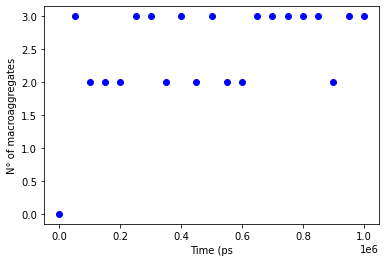

In [17]:
glico_1p_1.plot_aggregates()

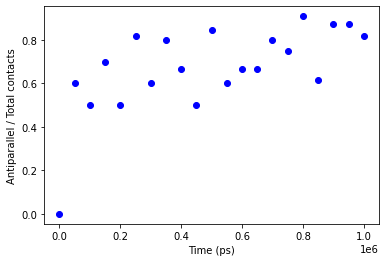

In [18]:
glico_1p_1.plot_contacts()

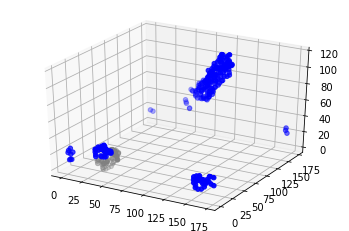

In [21]:
glico_1p_1.plot_frame_aggregate(950)

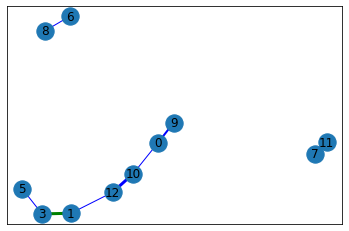

In [23]:
glico_1p_1.plot_graph(950)